# An Introduction to Neural Networks
## 02 - Singlelayer Perceptron

<p>
    Esse é o nosso primeiro tutorial realmente sobre Redes Neurais! Nesse tutorial, iremos estudar a Rede Neural de camada-única mais simples: a Singlelayer Perceptron. <br>Mais específicamente, iremos aprender como:
</p>
<ul>
    <li>Desenvolver um algoritmo iterativo para treinar uma Rede Neural, adaptando seus pesos;</li>
    <li>Utilizar uma Rede Neural para realizar classificação binária em um dataset;</li>
</ul>

### Bibliotecas

In [3]:
import pandas as pd                 # <-- Representação e Manipulação dos Dados
import numpy as np                  # <-- Biblioteca para Operações Matriciais e Complexas
import matplotlib.pyplot as plt     # <-- Biblioteca para Visualização de Dados

# Essa linha abaixo é apenas para que os 
# plots sejam gerados na mesma célula do código
%matplotlib inline

### Dataset

<p>
    Neste tutorial, utilizaremos um dataset artificial, criado apenas para servir como base à explicação dos conceitos relacionados ao treino de Redes Neurais de camada-única. <br>
    
    O código abaixo já está pronto. Para mais detalhes sobre como resgatar e manipular dados de arquivos, refira-se ao Tutorial 01.
</p>

In [160]:
## CARREGANDO E PRÉ-PROCESSANDO OS DADOS ##
# Carregando os dados a partir do arquivo .csv
data = pd.read_csv("datasets/data_01.csv")

# Armazenando as dimensões dos dados
m = data.shape[0]
n = data.shape[1]-1

# Separação do Conjunto de Treino e Conjunto de Teste
trainingSize = int(0.8 * m)
indexes = np.random.randint(0, m, m)
trainData = data.iloc[indexes[:trainingSize]]
testData = data.iloc[indexes[trainingSize:]]

# Obtendo matrizes (formato Numpy) correspondentes
X_train = trainData.iloc[:,:-1].values
y_train = trainData.iloc[:, -1].values

X_test = testData.iloc[:,:-1].values
y_test = testData.iloc[:, -1].values

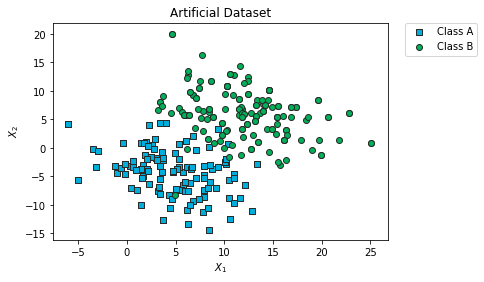

In [161]:
## VISUALIZAÇÃO CONDICIONADA COM O MATPLOTLIB E NUMPY ##
plt.figure()

a_class = np.where(y_train == "A")
b_class = np.where(y_train == "B")

plt.title("Artificial Dataset"); plt.xlabel("$X_1$"); plt.ylabel("$X_2$")

plt.scatter(X_train[a_class,0], X_train[a_class,1], marker="s", color="#00aedb", edgecolor="#2A2A2A", label="Class A")
plt.scatter(X_train[b_class,0], X_train[b_class,1], marker="o", color="#00b159", edgecolor="#2A2A2A", label="Class B")

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

### Parte 1 -  Treinando uma Rede Neural

In [ ]:
def slp_train(X, y, alfa=1e-2, maxIt=1000):
    